In [6]:
import os
from misvis.mat import MSTM
from functools import reduce
import pandas as pd

In [7]:
matfs = []
root = '../../matlab_output/0-42%'

for k in os.listdir(root):
    if not k.startswith('1harm'):
        matfs.append(MSTM(os.path.join(root, k)))

In [8]:
matfs[0].field = reduce(lambda x, y: x + y, [k.field for k in matfs]) / len(matfs)

In [9]:
from mesh import MeshGenerator

abc = MeshGenerator()
circles = abc.project_2d(edge=15, gap=83 * 2, radius=8.9, mult=12, angle=14.324)
circles = pd.DataFrame(circles, columns=['x', 'y', 'z', 'r'])
circles

,x,y,z,r
0,-14640.917853,0.0,-5066.336015,8.9
1,-15277.540120,0.0,-2573.131184,8.9
2,-14473.775630,0.0,-5023.657427,8.9
3,-15110.397896,0.0,-2530.452596,8.9
4,-14306.633407,0.0,-4980.978839,8.9
...,...,...,...,...
355,14306.633407,0.0,4980.978839,8.9
356,15110.397896,0.0,2530.452596,8.9
357,14473.775630,0.0,5023.657427,8.9
358,15277.540120,0.0,2573.131184,8.9


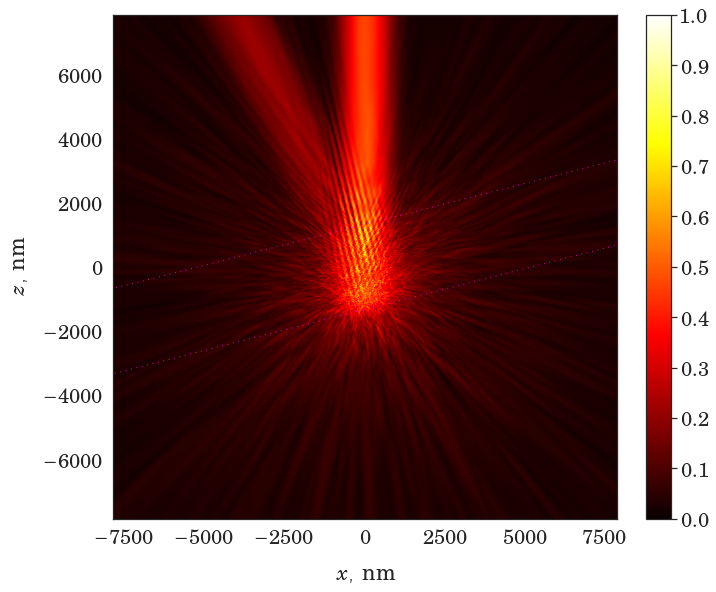

In [11]:
f, a, bbea = matfs[0].plot_field(
        
        figsize=(10, 10), 
        #angles=[(24, 0.0), (-135, 0), (0, 0)],
        font_scale=2,
        reduce=0.9, 
        trim=0,
        #vmax=1,#matfs[0].field.max(),
        target={'plot' : True, 'alpha' : 1, 'color' : 'magenta', 'linewidth' : 0.4},
        bartick=0.1,
        normalize=True,
        external_circles=circles
        
    )

In [12]:
f.savefig('../tex/components/img/celes/mean_field_0_42.pdf', bbox_inches='tight', bbox_extra_artists=bbea)